<a href="https://colab.research.google.com/github/Chakri11234/Rhinoplasty_AI/blob/main/RhinoPlasty_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gradio

In [ ]:
import gradio as gr
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load Stable Diffusion Inpainting Model
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting"
).to(device)

print("✅ Model Loaded Successfully!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Model Loaded Successfully!


In [2]:
import gradio as gr
import torch
from PIL import Image
from diffusers import StableDiffusionXLInpaintPipeline

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load SDXL Inpainting model (correct pipeline + model)
pipe = StableDiffusionXLInpaintPipeline.from_pretrained(
    "diffusers/stable-diffusion-xl-1.0-inpainting-0.1",
    torch_dtype=torch.float16,
    variant="fp16"
).to(device)

print("✅ Model Loaded Successfully!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


✅ Model Loaded Successfully!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import dlib
import cv2
from PIL import Image
import torch
import gradio as gr
import os
from diffusers import StableDiffusionXLInpaintPipeline

# Load Inpainting Model
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionXLInpaintPipeline.from_pretrained(
    "diffusers/stable-diffusion-xl-1.0-inpainting-0.1",
    torch_dtype=torch.float16,
    variant="fp16"
).to(device)

# Load Dlib Landmark Predictor
predictor_path = "/content/drive/My Drive/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)


# Nose style prompts
front_prompts = {
    "Small": "Ultra-detailed front-facing portrait of a young woman, small and delicate nose, symmetrical face, high-resolution DSLR photo, soft studio lighting, 8k realism",
    "Sharp": "Front view of a hyper-realistic man with a sharp, angular nose, clear skin, intense lighting, ultra-detailed face, symmetrical features, cinematic portrait",
    "Round": "Close-up front portrait of a person with a round, bulbous nose, photorealistic texture, soft lighting, 8k detail, natural facial structure",
    "Wide": "High-resolution front portrait with a wide, flat nose, realistic facial proportions, full symmetry, studio-lit DSLR photograph",
    "Natural": "Natural-looking front view of a person with an average, unmodified nose, minimal retouching, photorealism, clear light, healthy skin tone",
    "Pointed": "Sharp front-facing portrait of a woman with a pointed, slender nose, 8k quality, perfect lighting, flawless skin, professional beauty photo",
    "Button": "Front portrait of a cute young woman with a small button nose, wide eyes, soft lighting, smooth skin, ultra-realistic photography",
    "Greek": "Elegant front-facing Greek sculpture-style woman, classical straight nose, perfect symmetry, marble skin tone, photorealistic image",
    "Roman": "Powerful male portrait from the front, strong Roman nose with high bridge, realistic lighting, masculine features, clear facial details",
    "Snub": "Front portrait of a person with a snub nose, slightly upturned, round nasal tip, cinematic soft light, high-quality face photo"
}

left_prompts = {
    "Small": "Left side profile of a person with a small, delicate nose",
    "Sharp": "Left profile of a person with a sharp, defined nose",
    "Round": "Left side profile of a person with a round, bulbous nose",
    "Wide": "Left profile of a person with a wide, broad nose",
    "Natural": "Left side portrait with a naturally shaped nose",
    "Pointed": "Left profile of a person with a pointed, slender nose",
    "Greek": "Left side of a person with a straight Greek nose",
    "Roman": "Left profile with a Roman nose, strong bridge",
    "Snub": "Left side with a snub, upturned nose",
    "Button": "Left profile of a person with a cute button nose"
}

right_prompts = {
    "Small": "Right side profile of a person with a small, delicate nose",
    "Sharp": "Right profile of a person with a sharp, defined nose",
    "Round": "Right side profile of a person with a round, bulbous nose",
    "Wide": "Right profile of a person with a wide, broad nose",
    "Natural": "Right side portrait with a naturally shaped nose",
    "Pointed": "Right profile of a person with a pointed, slender nose",
    "Greek": "Right side of a person with a straight Greek nose",
    "Roman": "Right profile with a Roman nose, strong bridge",
    "Snub": "Right side with a snub, upturned nose",
    "Button": "Right profile of a person with a cute button nose"
}

# Estimate nose region
def estimate_nose_region(img_bgr, view_type):
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    if view_type == "Front View":
        faces = detector(gray)
        if len(faces) == 0:
            return None
        landmarks = predictor(gray, faces[0])
        nose_points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(27, 36)]
        x_coords = [pt[0] for pt in nose_points]
        y_coords = [pt[1] for pt in nose_points]
        nose_x = min(x_coords)
        nose_y = min(y_coords)
        nose_width = max(x_coords) - nose_x
        nose_height = max(y_coords) - nose_y
        return nose_x, nose_y, nose_width, nose_height

    elif view_type == "Right Side View":
        return 370, 200, 100, 100  # Right side of face
    elif view_type == "Left Side View":
        return 42, 200, 100, 100   # Symmetric left side of face

# Inpainting with rectangular mask
def modify_nose_view(input_image, view_type, nose_style):
    input_image = input_image.resize((512, 512))
    img_array = np.array(input_image)
    img_bgr = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)

    nose_box = estimate_nose_region(img_bgr, view_type)
    if nose_box is None:
        return "❌ No face/nose detected. Please try again with a clearer front-view image."

    nose_x, nose_y, nose_width, nose_height = nose_box

    # Get prompt based on view type
    if view_type == "Front View":
        prompt = front_prompts.get(nose_style, "natural nose")
    elif view_type == "Left Side View":
        prompt = left_prompts.get(nose_style, "natural nose")
    else:
        prompt = right_prompts.get(nose_style, "natural nose")

    mask = np.zeros((512, 512), dtype=np.uint8)

    if view_type == "Front View":
        padding = 5
        center = (nose_x + nose_width // 2, nose_y + nose_height // 2)
        axes = (int(nose_width * 0.7) + padding, int(nose_height * 1.2) + padding)
        cv2.ellipse(mask, center, axes, 0, 0, 360, 255, -1)
        mask = cv2.GaussianBlur(mask, (15, 15), 0)
    else:
        # Use rectangular mask for left and right side view
        mask[nose_y:nose_y+nose_height, nose_x:nose_x+nose_width] = 255

    mask_image = Image.fromarray(mask).convert("L")

    result = pipe(
        prompt=prompt,
        negative_prompt="blurry, distorted, artifact, bad nose",
        image=input_image.copy(),
        mask_image=mask_image,
        guidance_scale=7.5,
        num_inference_steps=55,
        strength=0.5
    )

    return result.images[0]

# Update styles based on view
def update_nose_styles(view_type):
    if view_type == "Front View":
        return gr.update(choices=list(front_prompts), value="Natural")
    elif view_type == "Left Side View":
        return gr.update(choices=list(left_prompts), value="Natural")
    else:
        return gr.update(choices=list(right_prompts), value="Natural")

# Gradio Interface
with gr.Blocks(title="Rhinoplasty AI") as iface:
    gr.Markdown("## 👃 Rhinoplasty AI – Nose Style Modifier")
    gr.Markdown("Upload a **front-view**, **left**, or **right** side-view image and choose your nose style.")

    with gr.Row():
        with gr.Column():
            img_input = gr.Image(type="pil", label="📤 Upload Face Image", show_label=True)
            view_input = gr.Radio(["Front View", "Left Side View", "Right Side View"], label="👁️ Choose View", value="Front View")
            style_input = gr.Radio(list(front_prompts), label="✨ Choose Nose Style", value="Natural")
            submit_btn = gr.Button("🔄 Modify Nose")

        with gr.Column():
            output_img = gr.Image(label="🖼️ Modified Output", show_label=True)

    view_input.change(fn=update_nose_styles, inputs=view_input, outputs=style_input)
    submit_btn.click(fn=modify_nose_view, inputs=[img_input, view_input, style_input], outputs=output_img)

    gr.Markdown("""
    ### ℹ️ About

    This AI tool performs **virtual rhinoplasty** using **Stable Diffusion 2 Inpainting**.

    - 🤖 Models:
      - `StableDiffusionInpaintPipeline` from HuggingFace 🤗
      - `dlib` for front-face landmark detection
      - OpenCV DNN (RetinaFace-like) fallback for region estimation

    ### 📸 Tips:
    - For **left/right** views, keep the nose centered in the image.
    - Use **clear**, **high-resolution** side profiles for better results.
    """)
    gr.HTML("""
    <style>
    .background-container {
        position: fixed;
        top: 0;
        left: 0;
        height: 100%;
        width: 100%;
        z-index: -1;
        overflow: hidden;
    }
    .background-container::before {
    content: "";
    background-image: url('https://media.istockphoto.com/id/1403481351/photo/woman-rhinoplasty-women-nose-shape-before-and-after-plastic-surgery-beauty-model-profile-side.jpg?s=612x612&w=0&k=20&c=krnd1SVhi4mr_k570Z3IV9OJrnyOpmLiKtmxDo3zm2g=');
    background-repeat: no-repeat;
    background-size: cover;
    background-position: center center;
    position: absolute;
    height: 100%;
    width: 100%;
    opacity: 0.25;
    filter: blur(8px);
  }
    </style>
    <div class="background-container"></div>
    """)

iface.launch(share=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://afbb8575a10f089439.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import numpy as np
import dlib
import cv2
from PIL import Image
import torch
import gradio as gr
import os
from diffusers import StableDiffusionXLInpaintPipeline

# Load Inpainting Model
pipe = StableDiffusionXLInpaintPipeline.from_pretrained(
    "diffusers/stable-diffusion-xl-1.0-inpainting-0.1",
    torch_dtype=torch.float16,
    variant="fp16"
).to(device)

# Load Dlib Landmark Predictor
predictor_path = "/content/drive/My Drive/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Nose style prompts
front_prompts = {
    "Small": "Front view of a realistic portrait photo of a person with a small, delicate nose",
    "Sharp": "Front view of a realistic portrait photo of a person with a sharp, defined nose",
    "Round": "Front view of a realistic portrait photo of a person with a round, bulbous nose",
    "Wide": "Front view of a realistic portrait photo of a person with a wide, flat nose",
    "Natural": "Front view of a realistic portrait photo of a person with a natural nose",
    "Pointed": "Front view of a realistic portrait photo of a person with a pointed, slender nose",
    "Button": "Front view of a realistic portrait photo of a person with a small button nose",
    "Greek": "Front view of a realistic portrait photo of a person with a classical Greek nose",
    "Roman": "Front view of a realistic portrait photo of a person with a Roman nose",
    "Snub": "Front view of a realistic portrait photo of a person with a snub nose"
}

# Estimate nose region (front view only)
def estimate_nose_region(img_bgr):
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    if len(faces) == 0:
        return None
    landmarks = predictor(gray, faces[0])
    nose_points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(27, 36)]
    x_coords = [pt[0] for pt in nose_points]
    y_coords = [pt[1] for pt in nose_points]
    nose_x = min(x_coords)
    nose_y = min(y_coords)
    nose_width = max(x_coords) - nose_x
    nose_height = max(y_coords) - nose_y
    return nose_x, nose_y, nose_width, nose_height

# Just resize image
def resize_only(img_pil):
    if img_pil is None:
        return None
    return img_pil.resize((512, 512))

# Resize + Inpaint
def process_image(input_image, nose_style):
    if input_image is None:
        return None, "❌ Please upload an image."

    resized_img = input_image.resize((512, 512))
    img_array = np.array(resized_img)
    img_bgr = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)

    nose_box = estimate_nose_region(img_bgr)
    if nose_box is None:
        return resized_img, "❌ No face/nose detected. Please upload a clear front-view image."

    nose_x, nose_y, nose_width, nose_height = nose_box
    prompt = front_prompts.get(nose_style, "natural nose")

    mask = np.zeros((512, 512), dtype=np.uint8)
    padding = 5
    center = (nose_x + nose_width // 2, nose_y + nose_height // 2)
    axes = (int(nose_width * 0.7) + padding, int(nose_height * 1.2) + padding)
    cv2.ellipse(mask, center, axes, 0, 0, 360, 255, -1)
    mask = cv2.GaussianBlur(mask, (15, 15), 0)

    mask_image = Image.fromarray(mask).convert("L")

    result = pipe(
        prompt=prompt,
        negative_prompt="blurry, distorted, artifact, bad nose",
        image=resized_img.copy(),
        mask_image=mask_image,
        guidance_scale=7.5,
        num_inference_steps=55,
        strength=0.5
    )

    return resized_img, result.images[0]

# Gradio Interface
with gr.Blocks(title="Rhinoplasty AI") as iface:
    gr.Markdown("## 👃 Rhinoplasty AI – Nose Style Modifier (Front View Only)")
    gr.Markdown("Upload a front-view face image. You can first resize the image, then apply nose modification.")

    with gr.Row():
        with gr.Column():
            img_input = gr.Image(type="pil", label="📤 Upload Face Image")
            style_input = gr.Radio(list(front_prompts.keys()), label="✨ Choose Nose Style", value="Natural")
            resize_btn = gr.Button("📐 Resize to 512x512 Only")
            submit_btn = gr.Button("🔄 Modify Nose")

        with gr.Column():
            resized_output = gr.Image(label="📐 512x512 Resized Image")
            modified_output = gr.Image(label="🖼️ Nose-Modified Image")

    # Button for just resizing
    resize_btn.click(fn=resize_only, inputs=img_input, outputs=resized_output)

    # Button for full inpainting
    submit_btn.click(fn=process_image, inputs=[img_input, style_input], outputs=[resized_output, modified_output])

iface.launch(share=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ad659528c23db4a8a6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import cv2
from matplotlib import pyplot as plt

# Path to your original image
image_path = "/content/image.jpg"  # <-- Replace with your image file path

# Load image
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Image not found or unable to load.")

# Convert BGR to RGB for displaying correctly with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Nose bounding box coordinates
x_min, y_min = 470, 200
x_max, y_max = 370, 300


# Draw rectangle (bounding box)
color = (255, 0, 0)  # Red color in BGR (for cv2)
thickness = 3
cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), color, thickness)

# Show image with bounding box
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title("Original Image with Nose Box")
plt.axis("off")
plt.show()

# Optional: Save the image with bounding box
output_path = "image_with_nose_box.jpg"
cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))
print(f"Image saved to {output_path}")

ValueError: Image not found or unable to load.

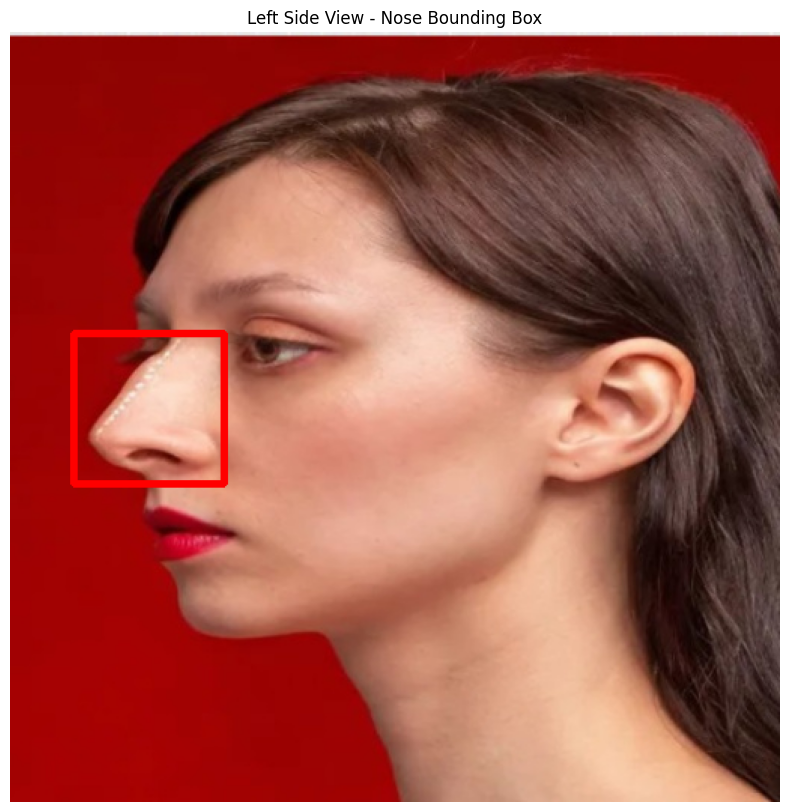

Image saved to left_side_nose_box.jpg


In [ ]:
import cv2
from matplotlib import pyplot as plt

# Path to your original image
image_path = "/content/Screenshot2025-06-18141800.jpeg"  # <-- Replace with your image file path

# Load image
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Image not found or unable to load.")

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Left-side nose bounding box coordinates (x, y, width, height)
x_min = 42
y_min = 200
box_width = 100
box_height = 100
x_max = x_min + box_width
y_max = y_min + box_height

# Draw rectangle
color = (255, 0, 0)  # Red (for OpenCV it's still BGR)
thickness = 3
cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), color, thickness)

# Show image with bounding box
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title("Left Side View - Nose Bounding Box")
plt.axis("off")
plt.show()

# Save output
output_path = "left_side_nose_box.jpg"
cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))
print(f"Image saved to {output_path}")

In [ ]:
pip install Pillow

In [ ]:
from PIL import Image

# Load the image (change 'input.jpg' to your file path)
image_path = '/content/imagreeeeeeeeeeeeeeeeee.jpg'
output_path = '/content/resized_image.jpg'

# Open the image
img = Image.open(image_path)

# Resize the image to 512x512
resized_img = img.resize((512, 512))

# Save the resized image
resized_img.save(output_path)

print(f"Image resized and saved as {output_path}")

Image resized and saved as /content/resized_image.jpg
